In [1]:
import pandas as pd
import requests #запросы
from datetime import datetime, timedelta


import matplotlib.pyplot as plt #библиотека для построения графиков
import csv

In [2]:
#               ------------------------------------------  Параметры ----------------------------- 

name = ['SOLUSDT', '1INCHUSDT', 'SUIUSDT', 'TONUSDT', 'STRKUSDT']    
days = 10 
d1 = dict()

#               ------------------------------------------ Функция ----------------------------- 

def pull_tokens_csv(i, days):
    
    end = int(datetime.now().timestamp() * 1000)
    start = int((datetime.now() - timedelta(days=days)).timestamp() * 1000) 


    url = f'https://api.binance.com/api/v3/klines'
    
    
    params = {
        'symbol': i,
        'interval': '1d',
        'startTime': start,
        'endTime': end,
        'limit': 7
        }

    response = requests.get(url, params=params)

    
    if response.status_code == 200: 
        data = response.json()
        d1[i] = data


    else:
        print(f"Ошибка: {response.status_code}")
        

#               ------------------------------------------ Вызов функции -----------------------------        

for i in name:     
    pull_tokens_csv(i, days)
    
    
print(d1)





{'SOLUSDT': [[1726444800000, '131.38000000', '132.40000000', '128.91000000', '131.47000000', '2136388.30500000', 1726531199999, '279606319.67364000', 1104570, '1010353.69800000', '132262932.41339000', '0'], [1726531200000, '131.47000000', '135.55000000', '130.12000000', '131.54000000', '2339845.91100000', 1726617599999, '310574750.11516000', 1168533, '1147980.27000000', '152406474.93575000', '0'], [1726617600000, '131.54000000', '134.45000000', '127.07000000', '134.34000000', '3309787.25800000', 1726703999999, '430929910.80921000', 1494231, '1712975.47800000', '223099732.05720000', '0'], [1726704000000, '134.34000000', '144.04000000', '134.27000000', '142.89000000', '4130435.35000000', 1726790399999, '577699422.06203000', 1537605, '2124830.12300000', '297081703.04948000', '0'], [1726790400000, '142.88000000', '152.50000000', '141.18000000', '146.66000000', '4488100.61500000', 1726876799999, '664077947.16975000', 1794412, '2179104.30000000', '322332048.19212000', '0'], [1726876800000, '

# Вторая таска 

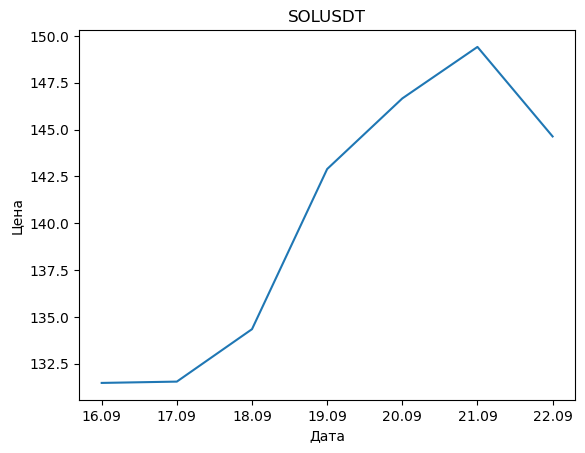

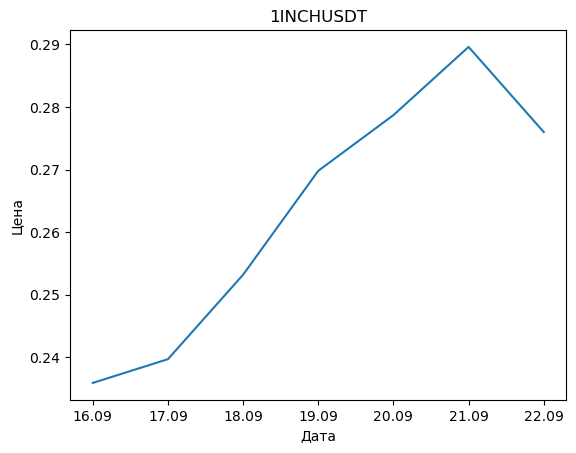

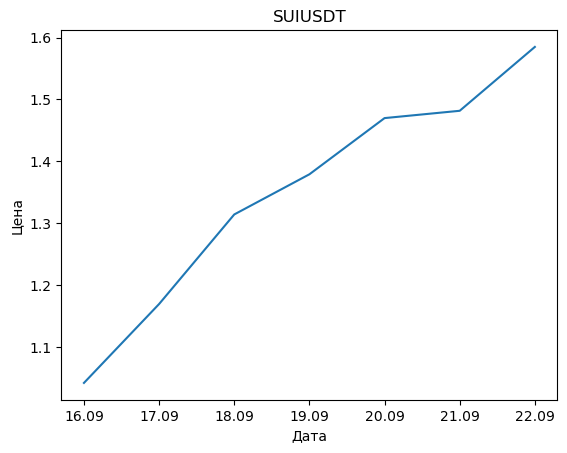

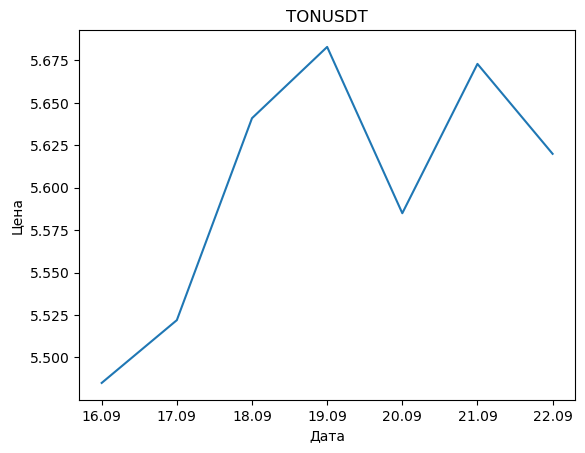

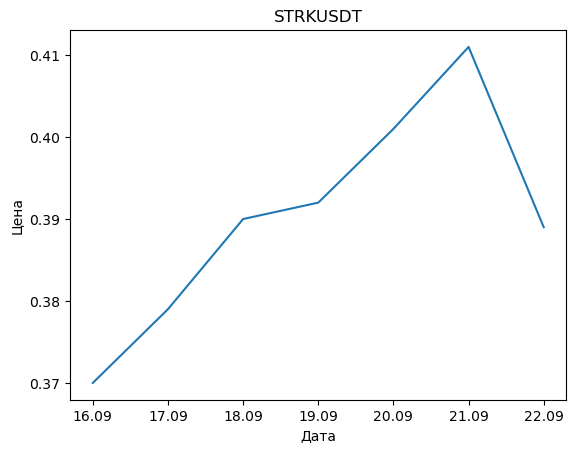

In [30]:
import json



for key, value_list in d1.items(): #проходимся по ключу-значению словаря
    
    
    dict_puller = []
    
    for i in value_list: #идем уже по элементам (спискам) списка - значению словаря
        
        
        
        close_time = datetime.fromtimestamp(i[0] / 1000).strftime("%d.%m.%Y, %H:%M:%S")
        close_price = float(i[4])
        dict_puller.append((close_time, close_price))
        
        df = pd.DataFrame(dict_puller, columns = ['Date', 'Close Price'])

        df.to_csv(f'{key}.csv', index = False, header = False)
        
        x = []
        y = []

    with open(f'{key}.csv', 'r') as datafile:
        plotting = csv.reader(datafile, delimiter = ',')
    
    
        for rows in plotting:
            x.append(rows[0][:5])
            y.append(float(rows[1]))

    plt.plot(x,y)
    plt.title(f'{key}')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.show()
        
    
    
    
